In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from structure import Structure
from scipy.stats import vonmises
from optimize_restarts import optimize_restarts
import pickle
import os

../../../main/source/bin/relax.linuxgccrelease -database ../../../main/database -in:file:s starting_files/4i4tE01_pred.pdb -overwrite -relax:thorough

# Test Set domains Analysis

In [12]:
def bestpred(target):
    losses = []

    for i, f in enumerate(os.listdir(f'../../steps/folded_structures/restarted_optim/{target}')):
        rs = f.split('_')[1]
        with open(f'../../steps/folded_structures/restarted_optim/{target}/{f}', 'rb') as s:
            temp = pickle.load(s)
            losses.append([int(rs), float(temp['loss'])])

    losses = np.array(losses)
    
    best_str_ind = int(losses[:, 0][np.argmin(losses[:, 1])])
    
    with open(f'../../steps/folded_structures/restarted_optim/{target}/{target}_{best_str_ind}_0.050_0.5_pred.pkl', 'rb') as s:
        bs = pickle.load(s)
    
    with torch.no_grad():
        dmap = bs['beststructure'].G()
    dmap += dmap.t()
    
    dmap = dmap.data.numpy()
    bins = np.concatenate(([0], np.linspace(2, 22, 31)))
    dmap_d = np.digitize(dmap, bins)
    
    torsion = bs['beststructure'].torsion.detach()
    s = Structure(target, torsion = torsion)
    s.pdb_coords(output_dir = '../../steps/folded_structures/structures')
    torch.save(torch.from_numpy(dmap_d), f'../../steps/folded_structures/structures/{target}_dmap.pt')
    
    return dmap, dmap_d

In [13]:
d, dd = bestpred('4i4tE01')

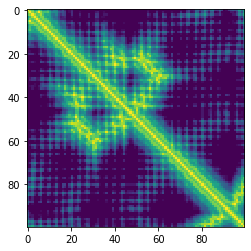

In [14]:
plt.imshow(dd, cmap='viridis_r')

In [2]:
with open(f'../../steps/folded_structures/restarted_optim/4i4tE01/4i4tE01_310_0.050_0.5_pred.pkl', 'rb') as s:
    temp = pickle.load(s)

In [3]:
t = temp['beststructure'].torsion.detach()

In [5]:
s = Structure('4i4tE01', torsion=t)

In [7]:
s.pdb_coords(output_dir='../../data/Rosetta/rosetta_bin_linux_2020.08.61146_bundle/demos/public/relax_a_large_structure/starting_files/')

---

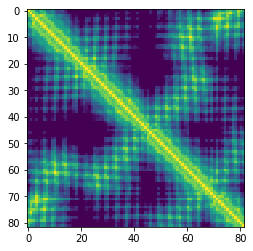

In [16]:
d1vmg, dd1vmg = bestpred('1vmgA00')
plt.imshow(dd1vmg, cmap='viridis_r')

---

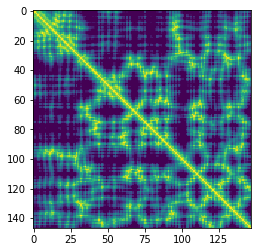

In [17]:
d4mve, d4mve = bestpred('4mveA00')
plt.imshow(d4mve, cmap='viridis_r')

---

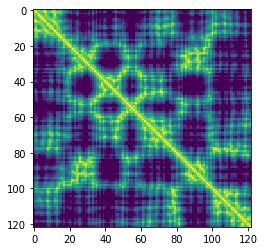

In [18]:
d2l1, d2l1 = bestpred('2l1iA00')
plt.imshow(d2l1, cmap='viridis_r')

---

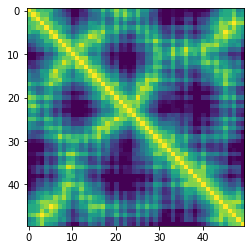

In [19]:
d3m4y, d3m4y = bestpred('3m4yA01')
plt.imshow(d3m4y, cmap='viridis_r')

---

In [2]:
aa = Structure('1a9xA08', '../../steps/test_predictions/1a9xA08.pred.pt')

In [3]:
aa.distogram.shape

torch.Size([32, 106, 106])

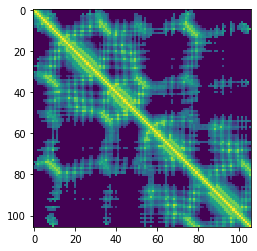

In [4]:
plt.imshow(torch.argmax(aa.distogram, dim=0), cmap='viridis_r')

In [2]:
so = optimize_restarts('1a9xA08', '../../steps/test_predictions/1a9xA08.pred.pt', 
                      lr=0.05, momentum=0.5, verbose=10)

Iteration 000, Loss: 31471.456
Iteration 010, Loss: 19613.592
Iteration 020, Loss: 22331.522
Iteration 030, Loss: 21407.424
Iteration 040, Loss: 16941.420
Iteration 050, Loss: 18426.833
Iteration 060, Loss: 18095.516
Iteration 070, Loss: 20960.825
Iteration 080, Loss: 19170.461
Iteration 090, Loss: 18054.403
Iteration 100, Loss: 16762.180
Iteration 110, Loss: 16560.393
Iteration 120, Loss: 16100.454
Iteration 130, Loss: 16402.510
Iteration 140, Loss: 17921.208
Iteration 150, Loss: 22752.959
Iteration 160, Loss: 20603.602
Iteration 170, Loss: 19540.553
Iteration 180, Loss: 18531.588
Iteration 190, Loss: 19867.167
Iteration 199, Loss: 19731.067
Iteration 200, Loss: 15590.971
Iteration 210, Loss: 15848.141
Iteration 220, Loss: 15539.434
Iteration 230, Loss: 15832.571
Iteration 240, Loss: 16015.872
Iteration 250, Loss: 16807.817
Iteration 260, Loss: 17142.770
Iteration 270, Loss: 17254.651
Iteration 280, Loss: 16968.370
Iteration 290, Loss: 16798.629
Iteration 300, Loss: 16527.739
Iteratio

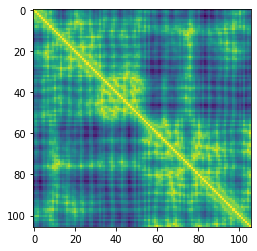

In [4]:
with torch.no_grad():
    dmap = so[0].G()
dmap += dmap.t()

plt.imshow(dmap, cmap='viridis_r')

In [6]:
so[0].pdb_coords(output_dir='trials')

---
Trying out distance threshold- this means that loss is calculated only for residues that are at least "distance threshold" of Angstroms away from each other. This should result in a more reasonable local folds

In [2]:
s1 = optimize_restarts('1a9xA08', '../../steps/test_predictions/1a9xA08.pred.pt', 
                      lr=0.05, momentum=0.5, verbose=10, distance_threshold=20)

Iteration 000, Loss: 12571.459
Iteration 010, Loss: 8257.764
Iteration 020, Loss: 8182.092
Iteration 030, Loss: 7745.487
Iteration 040, Loss: 7796.762
Iteration 050, Loss: 7877.184
Iteration 060, Loss: 7965.253
Iteration 070, Loss: 7969.624
Iteration 080, Loss: 7795.475
Iteration 090, Loss: 7767.909
Iteration 100, Loss: 7743.496
Iteration 110, Loss: 7619.610
Iteration 120, Loss: 7847.221
Iteration 130, Loss: 7673.795
Iteration 140, Loss: 7689.239
Iteration 150, Loss: 7656.968
Iteration 160, Loss: 7817.145
Iteration 170, Loss: 7614.671
Iteration 180, Loss: 7619.409
Iteration 190, Loss: 7613.487
Iteration 199, Loss: 7527.662
Iteration 200, Loss: 7331.312
Iteration 210, Loss: 7243.799
Iteration 220, Loss: 7107.823
Iteration 230, Loss: 7092.587
Iteration 240, Loss: 7128.658
Iteration 250, Loss: 7100.074
Iteration 260, Loss: 7092.120
Iteration 270, Loss: 7229.436
Iteration 280, Loss: 7326.114
Iteration 290, Loss: 7366.622
Iteration 300, Loss: 7296.537
Iteration 310, Loss: 7305.101
Iteration

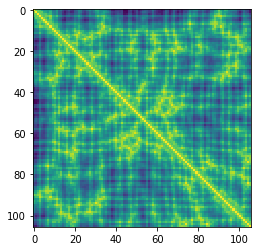

In [3]:
with torch.no_grad():
    dmap = s1[0].G()
dmap += dmap.t()

plt.imshow(dmap, cmap='viridis_r')

In [3]:
s2 = optimize_restarts('1a9xA08', '../../steps/test_predictions/1a9xA08.pred.pt',
                      lr=0.05, momentum=0.5, verbose=10, distance_threshold=20)

Iteration 000, Loss: 27503.953
Iteration 010, Loss: 20079.482
Iteration 020, Loss: 17938.541
Iteration 030, Loss: 17764.807
Iteration 040, Loss: 17182.217
Iteration 050, Loss: 17686.520
Iteration 060, Loss: 17351.025
Iteration 070, Loss: 17177.160
Iteration 080, Loss: 18885.480
Iteration 090, Loss: 17915.686
Iteration 100, Loss: 18032.027
Iteration 110, Loss: 17715.041
Iteration 120, Loss: 18647.160
Iteration 130, Loss: 17488.143
Iteration 140, Loss: 16962.277
Iteration 150, Loss: 17069.008
Iteration 160, Loss: 16913.906
Iteration 170, Loss: 17393.523
Iteration 180, Loss: 17457.330
Iteration 190, Loss: 16802.723
Iteration 199, Loss: 16519.621
Iteration 200, Loss: 16221.735
Iteration 210, Loss: 15818.250
Iteration 220, Loss: 15738.220
Iteration 230, Loss: 15255.756
Iteration 240, Loss: 15151.104
Iteration 250, Loss: 15090.472
Iteration 260, Loss: 14998.126
Iteration 270, Loss: 15854.948
Iteration 280, Loss: 15628.004
Iteration 290, Loss: 15401.489
Iteration 300, Loss: 15500.941
Iteratio

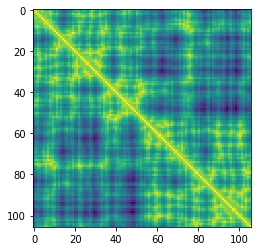

In [4]:
with torch.no_grad():
    dmap = s2[0].G()
dmap += dmap.t()

plt.imshow(dmap, cmap='viridis_r')